In [41]:
from utils_kv40_prediction import *

# Load Data

In [2]:
# training data for the clustering model for similairty-based ML
gdb13 = pd.read_csv('Data/GDB13_kmeans_clustering_train_data.csv', skiprows=1)
X_gdb13 = pd.read_csv('Data/GDB13-kmeans_clustering_train_data_descriptors.csv', skiprows=1).astype(float)

# to reproduce the work, we make sure to columns are in the same order as when we saved the dataframe
with open("kv40_columns_order.pkl", "rb") as f:
    kv40_column_orders = pickle.load(f)

# kv40-train and -test, and their descriptors
kv40_train = pd.read_excel('Data/kv40-train.xlsx')
kv40_test = pd.read_excel('Data/kv40-test.xlsx')
X_train = pd.read_csv('Data/kv40-train_descriptors.csv')
X_test = pd.read_csv('Data/kv40-test_descriptors.csv')
y_train = kv40_train['KV40 (cSt)']
y_test = kv40_test['KV40 (cSt)']

X_train = X_train[kv40_column_orders]
X_test = X_test[kv40_column_orders]

# Grouping molecules based on structures

In [3]:
# generate fingerprints of both training data for the clustering model & kv40-train and -test
fp_gdb13 = generate_fingerprints(gdb13['Smiles'].to_list(), "topological_fingerprint")
fp_train = generate_fingerprints(kv40_train['Smiles'].to_list(), "topological_fingerprint")
fp_test = generate_fingerprints(kv40_test['Smiles'].to_list(), "topological_fingerprint")

/Applications/anaconda3/envs/lube/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/envs/lube/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/envs/lube/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/envs/lube/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

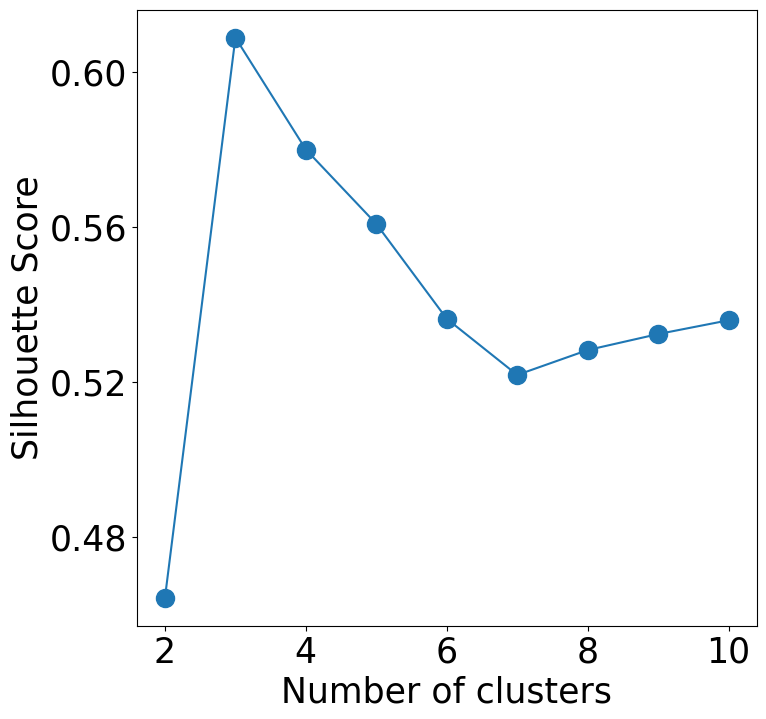

The optimanl number of clusters is 3 with silhouette scorere of 0.6088994332084048 


In [4]:
# map them to 2D 
pca_gdb13, fp_gdb13_red = map_2D(fp_gdb13) 

# and we try clustering them on range of number of clusters and pick the one w/ highest silhouette score
silhouette_kmeans_gdb13_equal = evaluate_clusters(fp_gdb13_red, 10, "kmeans")

grouping gdb13 molecules

/Applications/anaconda3/envs/lube/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


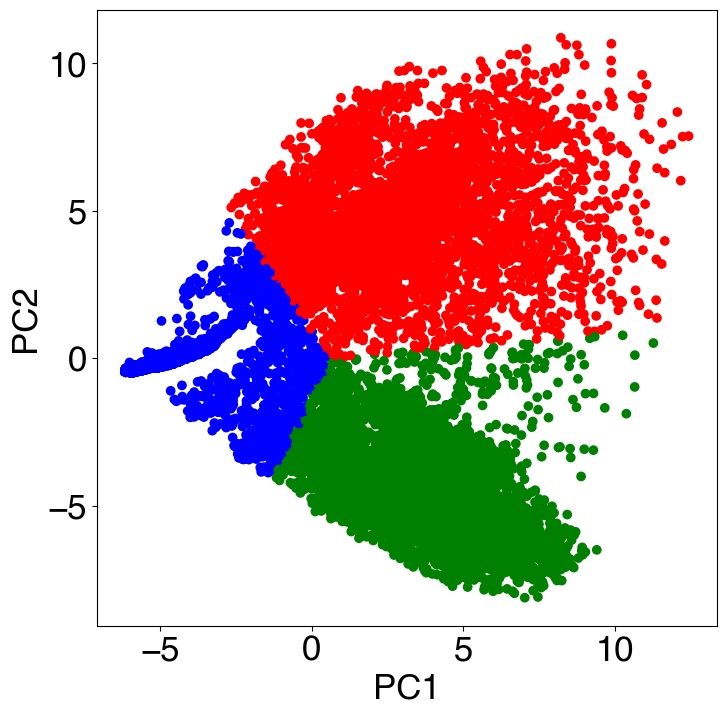

In [5]:
# now that we know the optimal number of clusters is 3, we 
kmeans_model_gdb13, labels_kmeans_gdb13 = cluster(fp_gdb13_red, 3, "kmeans")
visualize_2Dscatter(fp_gdb13_red, labels_kmeans_gdb13)

some information of what molecules are in each group from gdb13

In [6]:
# to show some molecular attributes group by group, we look at the descriptors of each group from gdb13
X_gdb13_group1 = X_gdb13.iloc[np.where(labels_kmeans_gdb13 == 0)[0]]
X_gdb13_group2 = X_gdb13.iloc[np.where(labels_kmeans_gdb13 == 1)[0]]
X_gdb13_group3 = X_gdb13.iloc[np.where(labels_kmeans_gdb13 == 2)[0]]

gdb13_smis_group1 = gdb13.iloc[np.where(labels_kmeans_gdb13 == 0)[0]]['Smiles']
gdb13_smis_group2 = gdb13.iloc[np.where(labels_kmeans_gdb13 == 1)[0]]['Smiles']
gdb13_smis_group3 = gdb13.iloc[np.where(labels_kmeans_gdb13 == 2)[0]]['Smiles']

In [7]:
# starting from group 1 of gdb13
mol_attrs_gdb13_group1 = get_mol_attrs(X_gdb13_group1, gdb13_smis_group1)
print(f"structural attributes of group1 of gdb13: {mol_attrs_gdb13_group1}")

structural attributes of group1 of gdb13:                                  Value
Number of molecules        4315.000000
Molecular weight            150.795948
Number of Rings               1.664890
Number of Aromatic Rings      0.048899
Number of Aliphatic Rings     1.615991
Number of Saturated Rings     0.980533
Number of Heteroatoms         2.117034
Ketone                        0.353650
Ether                         1.333951
Ester                         0.106605
Carboxylic Acid               0.017613
Alcohol                       0.428042
Aldehyde                      0.135574


In [8]:
# group 2 of gdb13
mol_attrs_gdb13_group2 = get_mol_attrs(X_gdb13_group2, gdb13_smis_group2)
print(f"structural attributes of group2 of gdb13: {mol_attrs_gdb13_group2}")

structural attributes of group2 of gdb13:                                  Value
Number of molecules        4352.000000
Molecular weight            153.425670
Number of Rings               1.929917
Number of Aromatic Rings      0.000000
Number of Aliphatic Rings     1.929917
Number of Saturated Rings     0.689798
Number of Heteroatoms         0.080653
Ketone                        0.036305
Ether                         0.014017
Ester                         0.000460
Carboxylic Acid               0.001149
Alcohol                       0.035846
Aldehyde                      0.023438


In [9]:
# group 3 of gdb13
mol_attrs_gdb13_group3 = get_mol_attrs(X_gdb13_group3, gdb13_smis_group3)
print(f"structural attributes of group3 of gdb13: {mol_attrs_gdb13_group3}")

structural attributes of group3 of gdb13:                                  Value
Number of molecules        6333.000000
Molecular weight            161.246175
Number of Rings               2.880783
Number of Aromatic Rings      0.006000
Number of Aliphatic Rings     2.874783
Number of Saturated Rings     2.815569
Number of Heteroatoms         0.102479
Ketone                        0.048476
Ether                         0.014527
Ester                         0.000947
Carboxylic Acid               0.001737
Alcohol                       0.048003
Aldehyde                      0.021791


grouping kv40-train and -test molecules

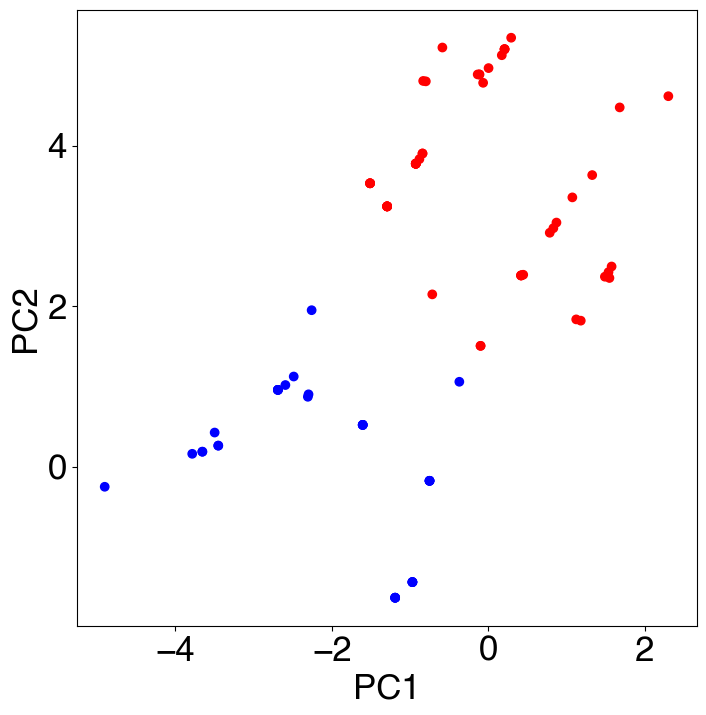

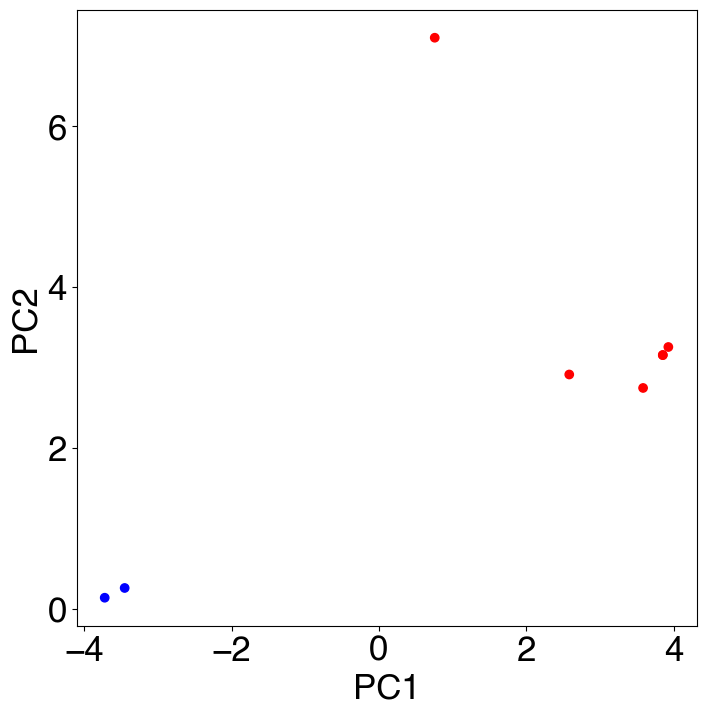

In [10]:
# then, we use the trained clustering model to group the molecules from KV40-train and -test
fp_train_red = pca_gdb13.transform(fp_train)
labels_kmeans_train  = kmeans_model_gdb13.predict(fp_train_red)
visualize_2Dscatter(fp_train_red , labels_kmeans_train)

fp_test_red = pca_gdb13.transform(fp_test)
labels_kmeans_test = kmeans_model_gdb13.predict(fp_test_red)
visualize_2Dscatter(fp_test_red, labels_kmeans_test)

information of each group from kv40-train

In [11]:
# smiles group by group
kv40_train_smis_group1 = kv40_train['Smiles'].iloc[np.where(labels_kmeans_train == 0)[0]]
kv40_train_smis_group3 = kv40_train['Smiles'].iloc[np.where(labels_kmeans_train == 2)[0]]

kv40_test_smis_group1 = kv40_test['Smiles'].iloc[np.where(labels_kmeans_test == 0)[0]]
kv40_test_smis_group3 = kv40_test['Smiles'].iloc[np.where(labels_kmeans_test == 2)[0]]

# descriptors group by group
X_train_group1 = X_train.iloc[np.where(labels_kmeans_train == 0)[0]]
X_train_group3 = X_train.iloc[np.where(labels_kmeans_train == 2)[0]]

X_test_group1 = X_test.iloc[np.where(labels_kmeans_test == 0)[0]]
X_test_group3 = X_test.iloc[np.where(labels_kmeans_test == 2)[0]]

In [12]:
# starting from group 1 of kv40-train
mol_attrs_kv40_train_group1 = get_mol_attrs(X_train_group1, kv40_train_smis_group1)
print(f"structural attributes of group1 of kv40-train: {mol_attrs_kv40_train_group1}")

structural attributes of group1 of kv40-train:                                 Value
Number of molecules         53.000000
Molecular weight           364.808605
Number of Rings              0.094340
Number of Aromatic Rings     0.075472
Number of Aliphatic Rings    0.018868
Number of Saturated Rings    0.018868
Number of Heteroatoms        3.132075
Ketone                       1.490566
Ether                        1.584906
Ester                        1.452830
Carboxylic Acid              0.037736
Alcohol                      0.056604
Aldehyde                     0.000000


In [13]:
# starting from group 3 of kv40-train
mol_attrs_kv40_train_group3 = get_mol_attrs(X_train_group3, kv40_train_smis_group3)
print(f"structural attributes of group3 of kv40-train: {mol_attrs_kv40_train_group3}")

structural attributes of group3 of kv40-train:                                 Value
Number of molecules         33.000000
Molecular weight           285.224155
Number of Rings              0.363636
Number of Aromatic Rings     0.090909
Number of Aliphatic Rings    0.272727
Number of Saturated Rings    0.272727
Number of Heteroatoms        0.060606
Ketone                       0.000000
Ether                        0.000000
Ester                        0.000000
Carboxylic Acid              0.000000
Alcohol                      0.060606
Aldehyde                     0.000000


In [14]:
# starting from group 1 of kv40-test
mol_attrs_kv40_test_group1 = get_mol_attrs(X_test_group1, kv40_test_smis_group1)
print(f"structural attributes of group1 of kv40-test: {mol_attrs_kv40_test_group1}")

structural attributes of group1 of kv40-test:                                 Value
Number of molecules          6.000000
Molecular weight           413.021664
Number of Rings              2.166667
Number of Aromatic Rings     1.666667
Number of Aliphatic Rings    0.500000
Number of Saturated Rings    0.500000
Number of Heteroatoms        2.000000
Ketone                       0.000000
Ether                        0.333333
Ester                        0.000000
Carboxylic Acid              0.000000
Alcohol                      0.000000
Aldehyde                     0.000000


In [15]:
# starting from group 3 of kv40-test
mol_attrs_kv40_test_group3 = get_mol_attrs(X_test_group3, kv40_test_smis_group3)
print(f"structural attributes of group3 of kv40-test: {mol_attrs_kv40_test_group3}")

structural attributes of group3 of kv40-test:                                 Value
Number of molecules          2.000000
Molecular weight           429.492977
Number of Rings              0.000000
Number of Aromatic Rings     0.000000
Number of Aliphatic Rings    0.000000
Number of Saturated Rings    0.000000
Number of Heteroatoms        0.000000
Ketone                       0.000000
Ether                        0.000000
Ester                        0.000000
Carboxylic Acid              0.000000
Alcohol                      0.000000
Aldehyde                     0.000000


# Standard Random Forest

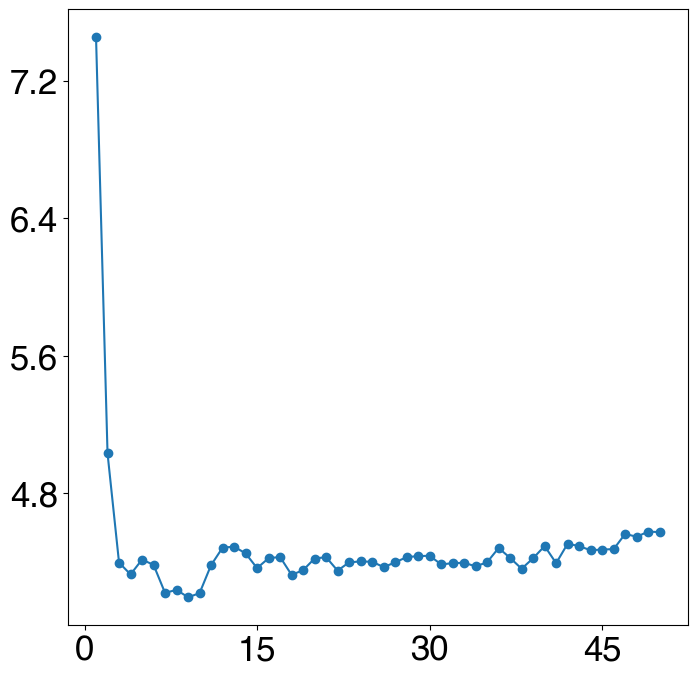

The best 10-fold CV RMSE is 4.193588736020721 when trained with 9 top features


In [16]:
X_train_uncorr = remove_corr_features(X_train, corr_cutoff=0.9) # keep only the uncorrelated ones
topfeats_standard_rf, topfeats_standard_rf_selected, n_features_standard_rf, RMSE_CV_standard_rf = feat_importance_and_RFE(X_train_uncorr, y_train, 'MDI', 50) # RFE

Feautre Importance - Standard Random Forest


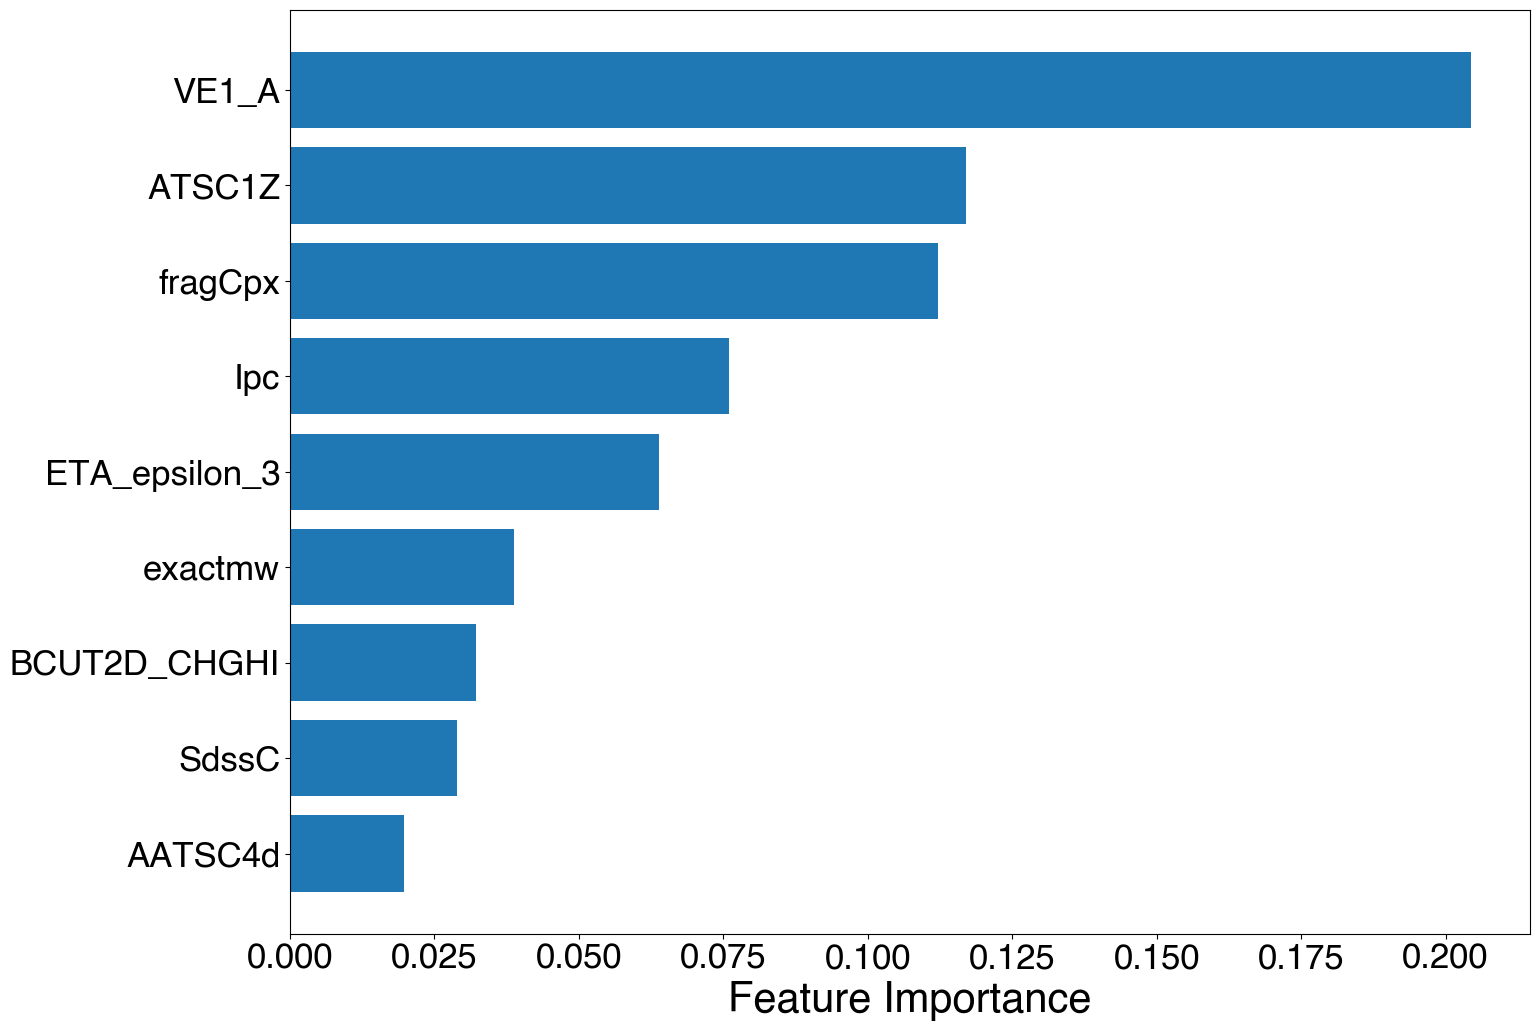

In [17]:
print("Feautre Importance - Standard Random Forest")

# Ensure matplotlib is set to use Helvetica
plt.rcParams['font.family'] = 'Helvetica'

# Create a figure with the specified size
plt.figure(figsize=(16, 12))

# Plot horizontal bar chart
plt.barh(
    topfeats_standard_rf_selected['Topfeats'][::-1],  # Reverse the order for display
    topfeats_standard_rf_selected['MDI'][::-1],       # Reverse the order for display
    # color='blue',  # Uncomment and set color if desired
)

# Set labels and ticks
plt.xlabel('Feature Importance', fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()


Predictive Performance on the Whole KV40-test - Standard Random Forest

R2 (Test): -0.2948789578562412
RMSE (Test): 4.481550957259744


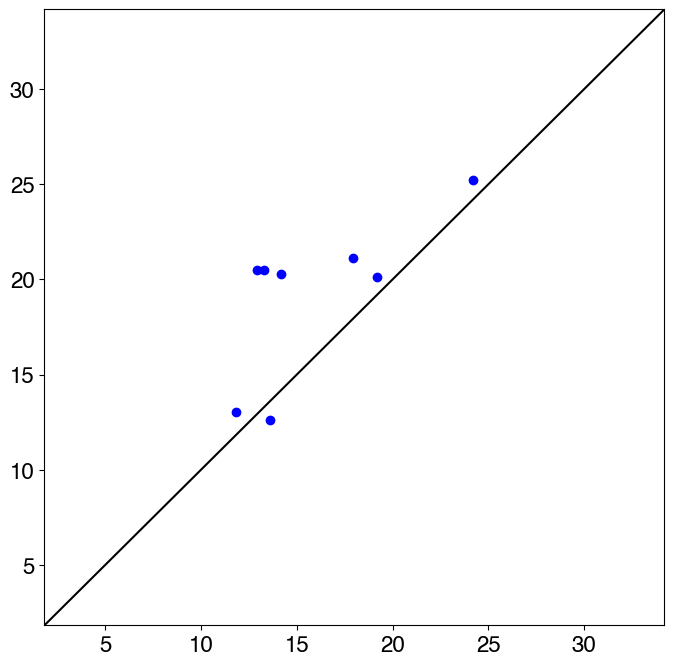

In [18]:
standard_rf, y_test_kv40_pred_standard_rf = train_and_test_rf(X_train_uncorr, y_train, X_test, y_test, topfeats_standard_rf_selected['Topfeats'])

Predictive Performance on the KV40-test Group 1 - Standard Random Forest

In [19]:
# we need this to test the trained model group by group on the test set
X_test_group1 = X_test.iloc[np.where(labels_kmeans_test == 0)[0]]
X_test_group3 = X_test.iloc[np.where(labels_kmeans_test == 2)[0]]

y_test_group1 = y_test[np.where(labels_kmeans_test == 0)[0]]
y_test_group3 = y_test[np.where(labels_kmeans_test == 2)[0]]

R2 (Test): -0.656637161128566
RMSE (Test): 5.137225058746023


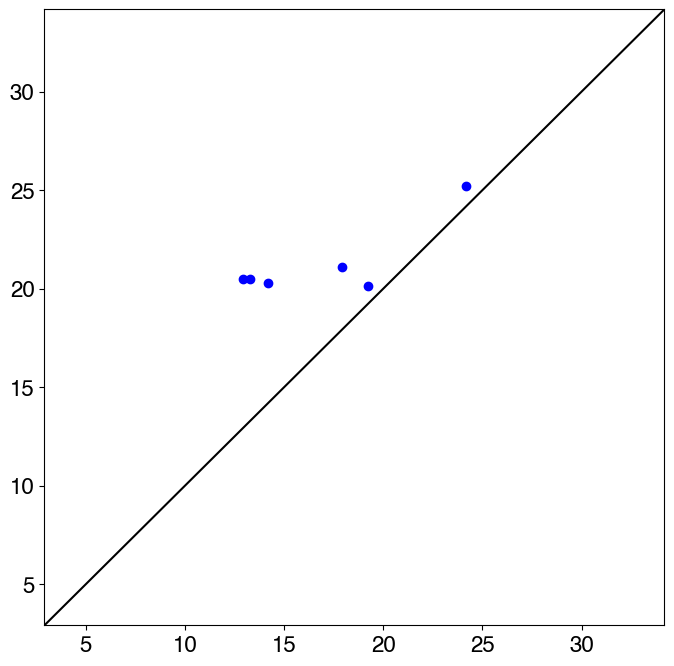

In [20]:
_, y_test_pred_standard_rf_group1 = train_and_test_rf(X_train, y_train, X_test_group1, y_test_group1, topfeats_standard_rf_selected['Topfeats'])

Predictive Performance on the KV40-test Group 3 - Standard Random Forest

R2 (Test): -0.5377883702453015
RMSE (Test): 1.0788660794735687


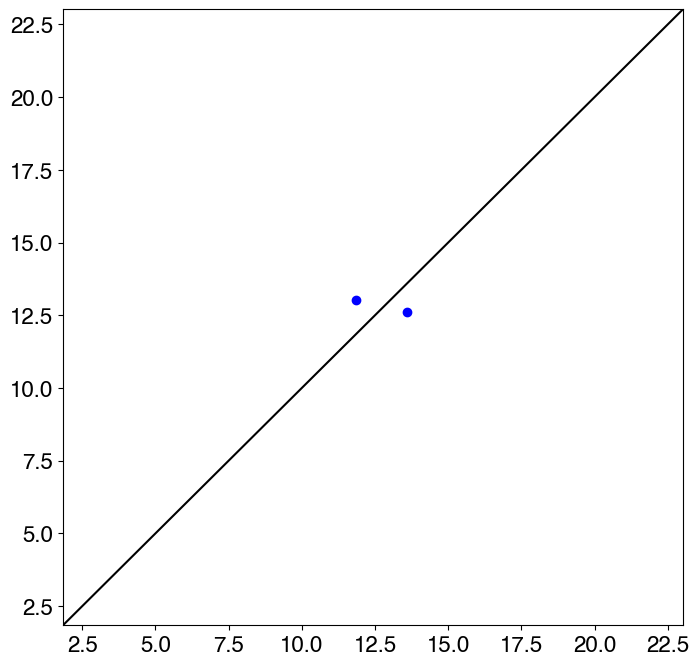

In [21]:
_, y_test_pred_standard_rf_group3 = train_and_test_rf(X_train, y_train, X_test_group3, y_test_group3, topfeats_standard_rf_selected['Topfeats'])

Final Plot - Standard Random Forest

R2 (Test): -0.2948789578562414
RMSE (Test): 4.481550957259744


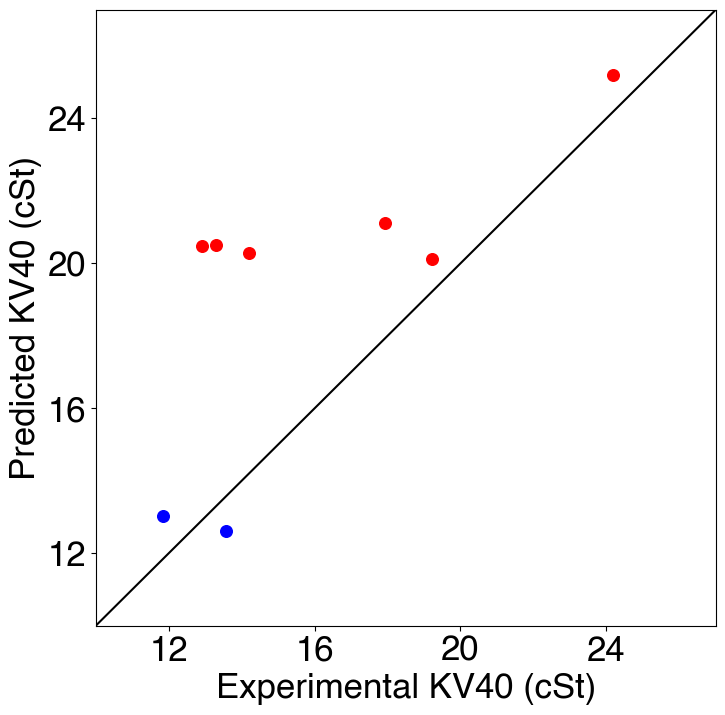

In [42]:
plot_parity_custom(y_test_group1.to_list(), y_test_pred_standard_rf_group1.tolist(), 
                   y_test_group3.to_list(), y_test_pred_standard_rf_group3.tolist(),  10, 27)

# Similarity-based ML 

In [23]:
# now we need train data group by group as well for similarity-based ml
X_train_group1 = X_train.iloc[np.where(labels_kmeans_train == 0)[0]]
X_train_group3 = X_train.iloc[np.where(labels_kmeans_train == 2)[0]]

y_train_group1 = y_train[np.where(labels_kmeans_train == 0)[0]]
y_train_group3 = y_train[np.where(labels_kmeans_train == 2)[0]]

# remove correlated features
X_train_group1_uncorr = remove_corr_features(X_train_group1, corr_cutoff=0.9)
X_train_group3_uncorr = remove_corr_features(X_train_group3, corr_cutoff=0.9)

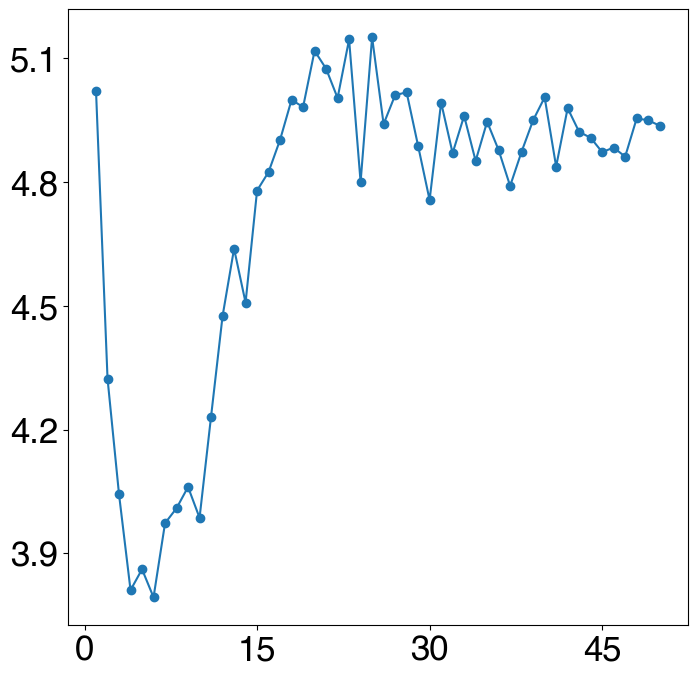

The best 10-fold CV RMSE is 3.7938811718444945 when trained with 6 top features


In [24]:
# corr analysis on group 1
topfeats_sim_ml_group1, topfeats_sim_ml_group1_selected, n_features_sim_ml_group1, RMSE_CV_sim_ml_group1 = feat_importance_and_RFE(X_train_group1_uncorr, y_train_group1, 'MDI', 50) # RFE

Feautre Importance for Group 1 - Similarirty-based ML


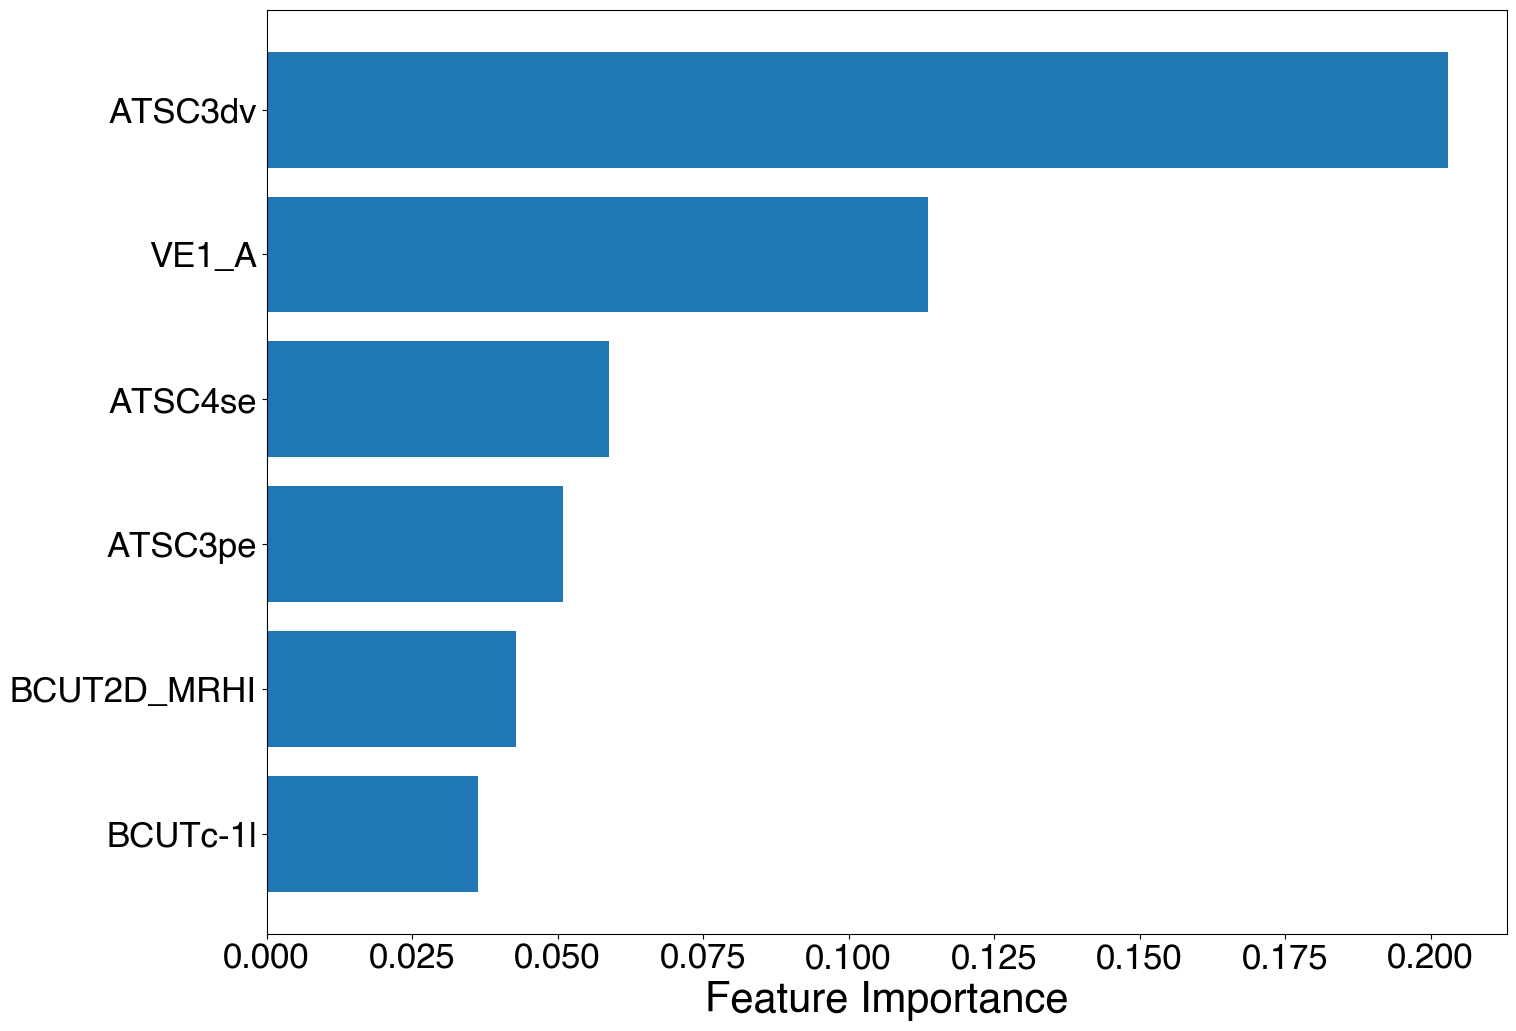

In [25]:
print("Feautre Importance for Group 1 - Similarirty-based ML")

# Ensure matplotlib is set to use Helvetica
plt.rcParams['font.family'] = 'Helvetica'

# Create a figure with the specified size
plt.figure(figsize=(16, 12))

# Plot horizontal bar chart
plt.barh(
    topfeats_sim_ml_group1_selected['Topfeats'][::-1],  # Reverse the order for display
    topfeats_sim_ml_group1_selected['MDI'][::-1],       # Reverse the order for display
    # color='blue',  # Uncomment and set color if desired
)

# Set labels and ticks
plt.xlabel('Feature Importance', fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()


Predictive Performance on the KV40-test Group 1 - Similarirty-based ML

R2 (Test): 0.6414792431762968
RMSE (Test): 2.389857714600382


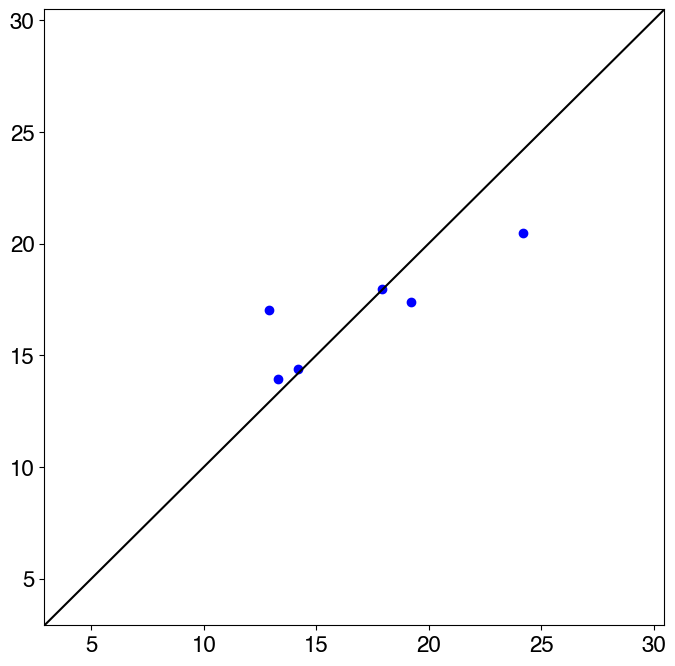

In [26]:
sim_ml_group1, y_test_pred_sim_ml_group1 = train_and_test_rf(X_train_group1_uncorr, y_train_group1, 
                         X_test_group1, y_test_group1, topfeats_sim_ml_group1_selected['Topfeats'])

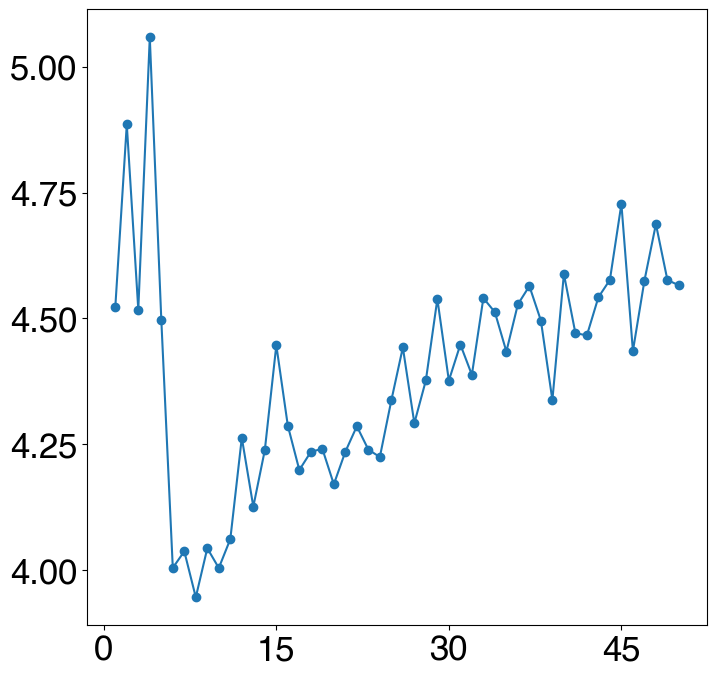

The best 10-fold CV RMSE is 3.945831310486935 when trained with 8 top features


In [27]:
# corr analysis on group 3
topfeats_sim_ml_group3, topfeats_sim_ml_group3_selected, n_features_sim_ml_group3, RMSE_CV_sim_ml_group3  = feat_importance_and_RFE(X_train_group3_uncorr, y_train_group3, 'MDI', 50) # top 11

Feautre Importance for Group 3 - Similarirty-based ML


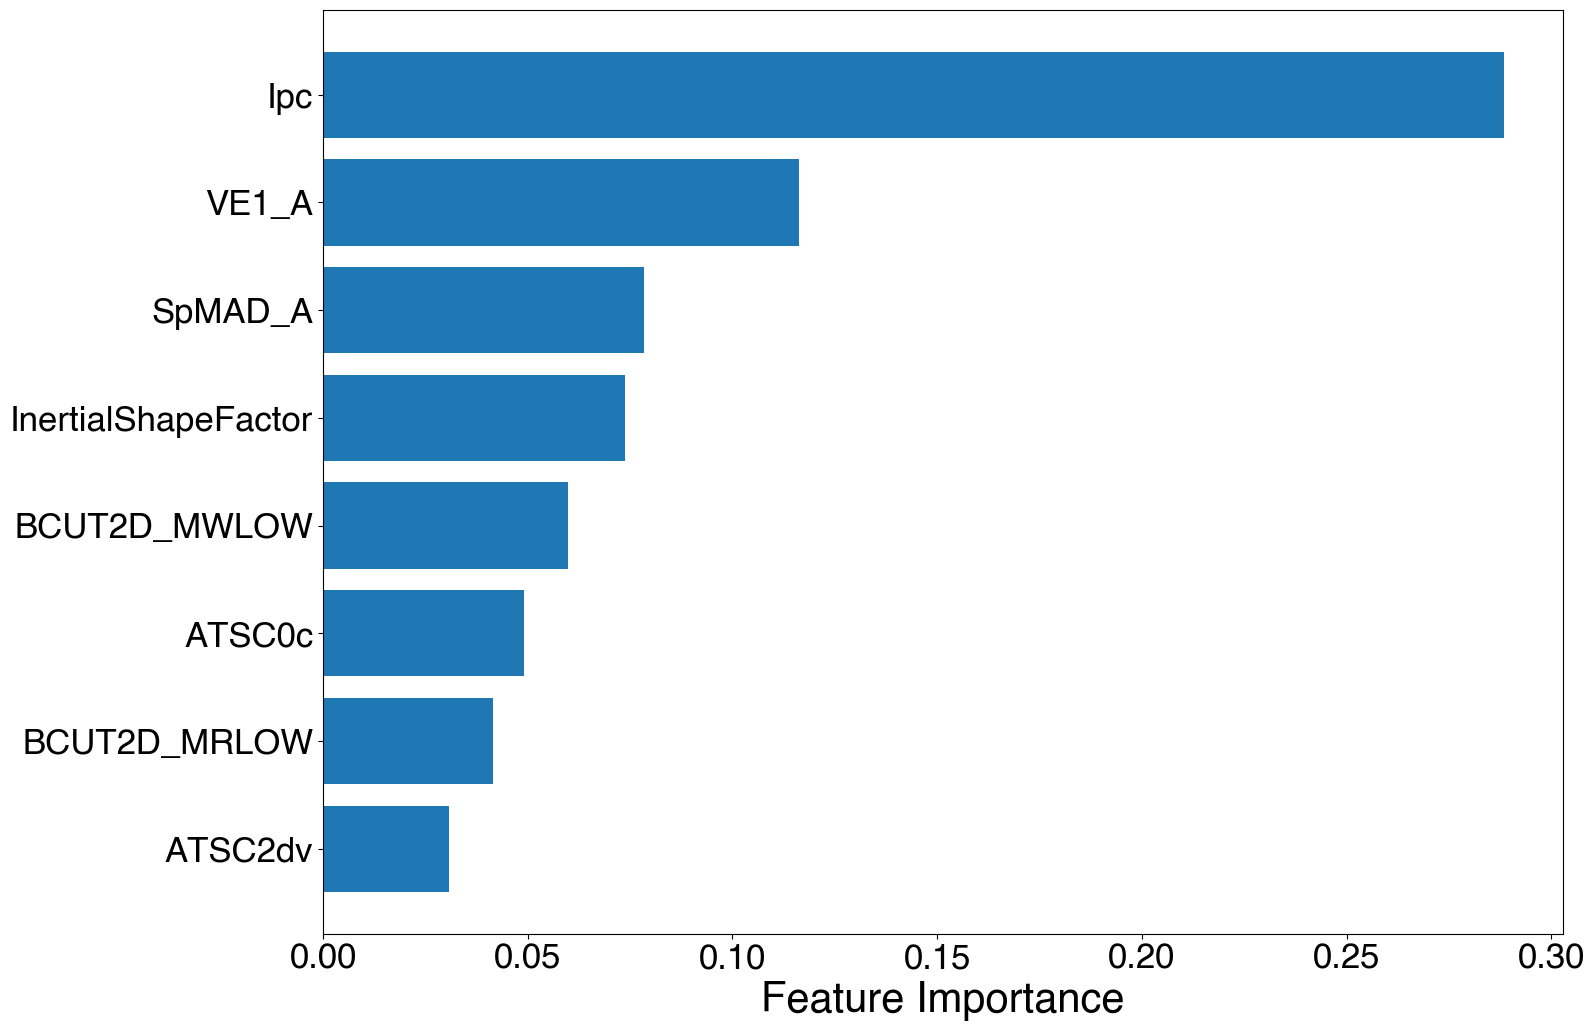

In [28]:
print("Feautre Importance for Group 3 - Similarirty-based ML")

# Ensure matplotlib is set to use Helvetica
plt.rcParams['font.family'] = 'Helvetica'

# Create a figure with the specified size
plt.figure(figsize=(16, 12))

# Plot horizontal bar chart
plt.barh(
    topfeats_sim_ml_group3_selected[:8]['Topfeats'][::-1],  # Reverse the order for display
    topfeats_sim_ml_group3_selected[:8]['MDI'][::-1],       # Reverse the order for display
    # color='blue',  # Uncomment and set color if desired
)

# Set labels and ticks
plt.xlabel('Feature Importance', fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()


Predictive Performance on the KV40-test Group 3 - Similarirty-based ML

R2 (Test): -20.169595071808466
RMSE (Test): 4.0029072572134154


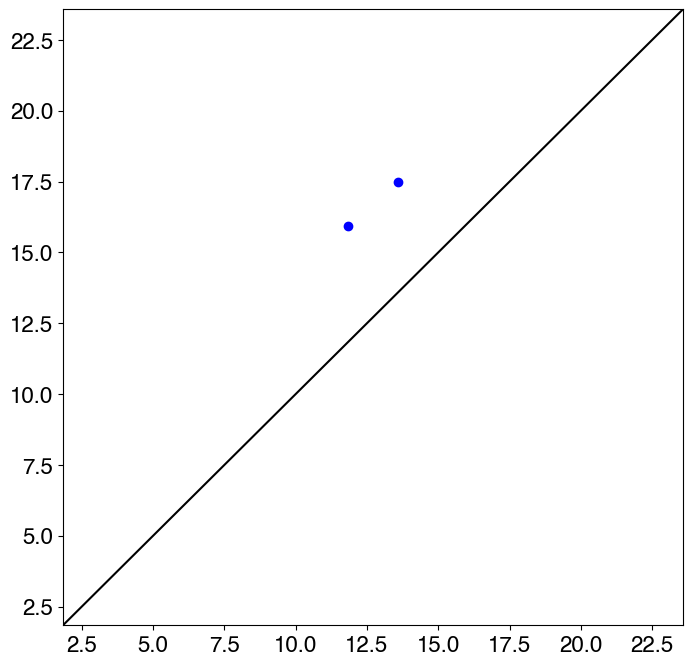

In [29]:
sim_ml_group3, y_test_pred_sim_ml_group3 = train_and_test_rf(X_train_group3_uncorr, y_train_group3, 
                         X_test_group3, y_test_group3, topfeats_sim_ml_group3_selected['Topfeats'])

Final Plot - Similarity-based ML

R2 (Test): 0.4655653278504017
RMSE (Test): 2.8791286094040984


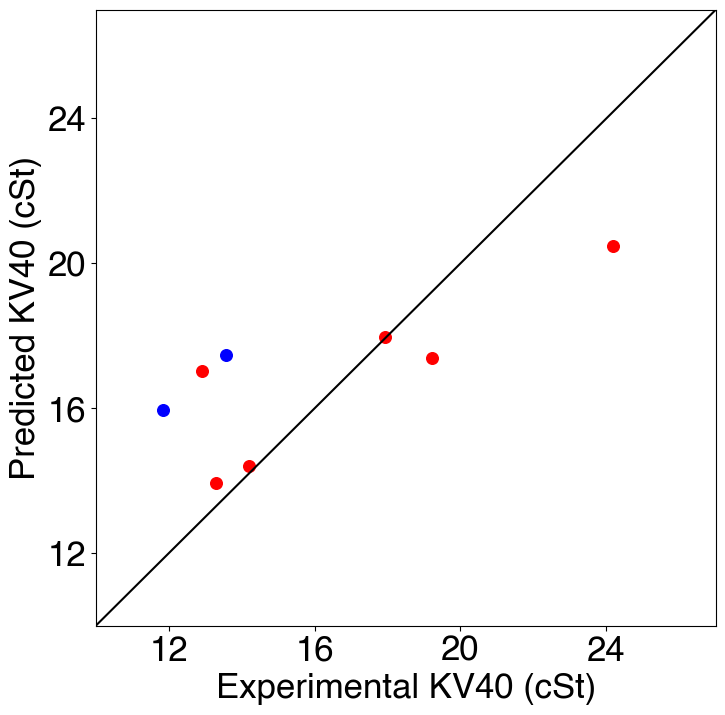

In [43]:
plot_parity_custom(y_test_group1.to_list(), y_test_pred_sim_ml_group1.tolist(), 
                   y_test_group3.to_list(), y_test_pred_sim_ml_group3.tolist(),  10, 27)

# Transfer Learning

In [31]:
# we retrieve the result from pretraining the 1000NNs to get the best performing one
with open(f"../NN_Pretraining/result_Cv_nn_optimization_overall.pkl", "rb") as f: 
    nn_pretrain_results = pickle.load(f)

# we retrieve the scaler used for NN
with open(f"scaler_Cv_tl.pkl", "rb") as f:
    scaler_Cv = pickle.load(f)

# 20 features selecteed for training
Cv_feats = ['NumAtoms', 'TIC1', 'NumRings', 'ATSC1Z', 'BCUTd-1l','BCUTdv-1l', 'exactmw', 'BalabanJ', 'ATS3Z', 'chi1v','n7FRing', 'VE1_A', 'Xch-3d', 'GATS1c', 'ATSC7d', 'ATSC6d', 'ATSC1dv', 'BertzCT', 'kappa3', 'n5Ring']

In [32]:
min_index = np.where(nn_pretrain_results['best_test_losses'] == np.min(nn_pretrain_results['best_test_losses']))[0][0]
best_nn = nn_pretrain_results['models'][min_index]

In [33]:
print(f"Structure of the selected pretrained NN: {best_nn}")
print()
print(f"The NN showed the minimum test error of {np.min(nn_pretrain_results['best_test_losses'])} during pretraining.")

Structure of the selected pretrained NN: Sequential(
  (0): Linear(in_features=20, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=1, bias=True)
)

The NN showed the minimum test error of 0.12411639839410782 during pretraining.


In [34]:
X_train_Cv = drop_duplicated_columns(X_train[Cv_feats])
X_test_Cv = drop_duplicated_columns(X_test[Cv_feats])
X_train_Cv_scaled = scaler_Cv.transform(X_train_Cv)
X_test_Cv_scaled = scaler_Cv.transform(X_test_Cv)
X_train_tl = extract_features_nth_layer(best_nn, torch.tensor(X_train_Cv_scaled, dtype=torch.float32), 2)
X_test_tl = extract_features_nth_layer(best_nn, torch.tensor(X_test_Cv_scaled, dtype=torch.float32), 2)

In [35]:
# we need this to test the trained model group by group on the test set
X_test_tl_group1 = X_test_tl.iloc[np.where(labels_kmeans_test == 0)[0]]
X_test_tl_group3 = X_test_tl.iloc[np.where(labels_kmeans_test == 2)[0]]

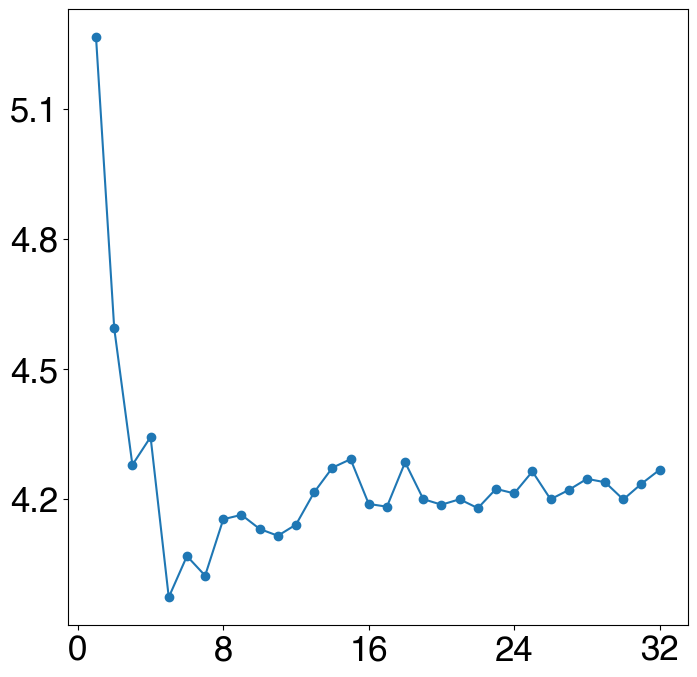

The best 10-fold CV RMSE is 3.974122286316901 when trained with 5 top features


In [36]:
topfeats_tl, topfeats_tl_selected, n_features_tl, RMSE_CV_tl = feat_importance_and_RFE(X_train_tl , y_train, 'MDI', X_train_tl.shape[1]) # top 11


Predictive Performance on the Whole KV40-test - Transfer Learning

R2 (Test): -0.5312387613954812
RMSE (Test): 4.873435350806107


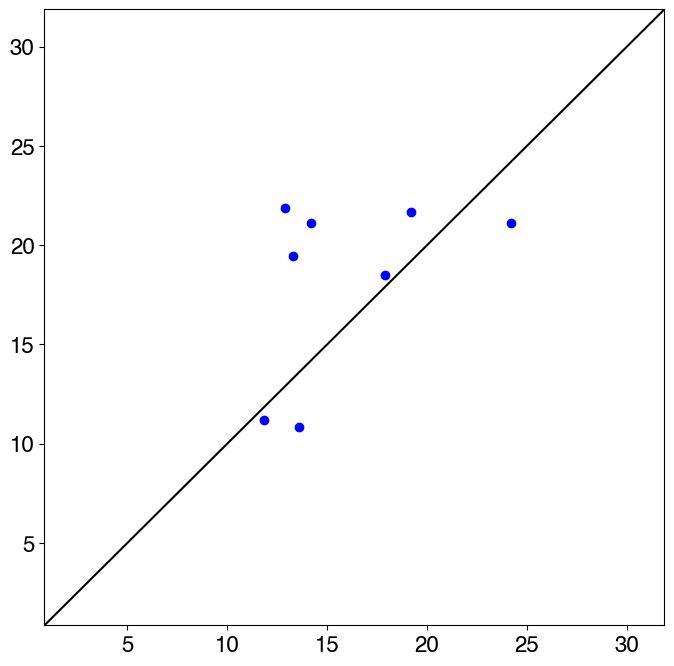

In [37]:
tl, y_test_pred_tl = train_and_test_rf(X_train_tl , y_train, X_test_tl, y_test, topfeats_tl_selected['Topfeats'])

Predictive Performance on the KV40-test Group 1 - Transfer Learning

R2 (Test): -0.906232500790652
RMSE (Test): 5.510649991543364


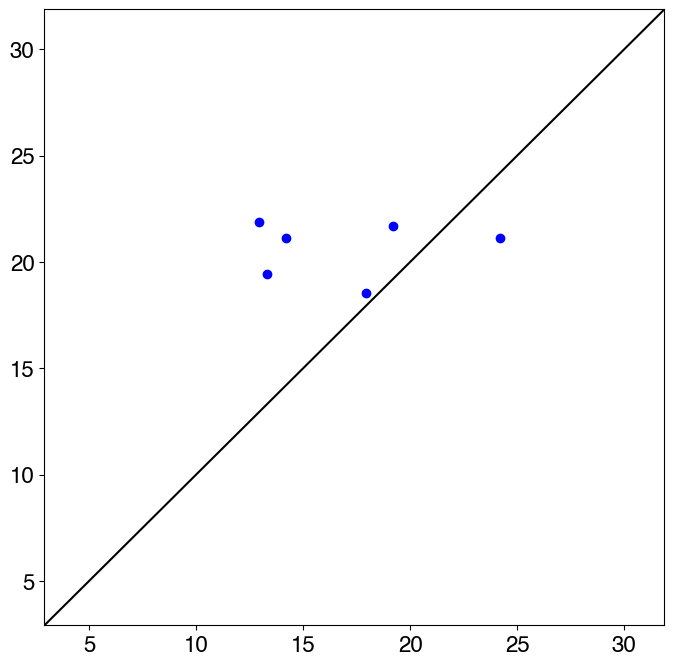

In [38]:
_, y_test_pred_tl_group1 = train_and_test_rf(X_train_tl , y_train, X_test_tl_group1, y_test_group1, topfeats_tl_selected['Topfeats'])

Predictive Performance on the KV40-test Group 3 - Transfer Learning

R2 (Test): -4.152197761997507
RMSE (Test): 1.974765425577406


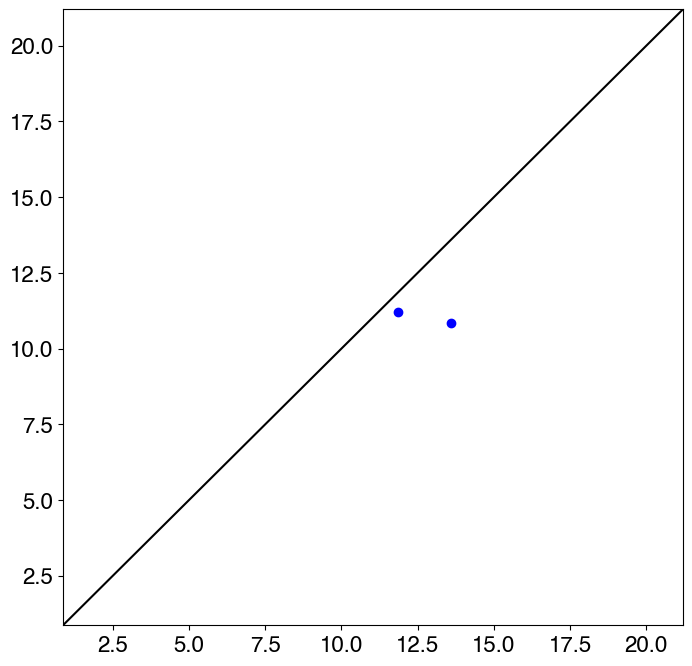

In [39]:
_, y_test_pred_tl_group3 = train_and_test_rf(X_train_tl , y_train, X_test_tl_group3, y_test_group3, topfeats_tl_selected['Topfeats'])

Final Plot - Transfer Learning

R2 (Test): -0.5312387613954814
RMSE (Test): 4.873435350806107


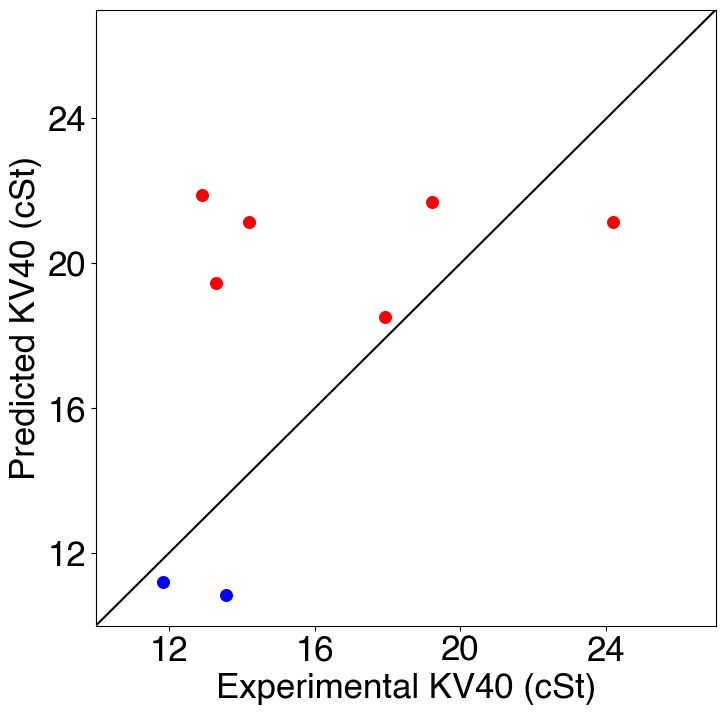

In [40]:
plot_parity_custom(y_test_group1.to_list(), y_test_pred_tl_group1.tolist(), 
                   y_test_group3.to_list(), y_test_pred_tl_group3.tolist(),  10, 27)